# Additonal Models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bb = pd.read_csv('clean_pitching.csv')
bb.drop('Unnamed: 0', axis=1, inplace=True)
bb

,team,win_pct,era,games,innings,hits,homeruns,walks,strikeouts,hbp,batters_faced,fip,whip,kw_ratio,year,on_base_pct
0,Atlanta Braves,0.469,4.33,162,1430.2,1451,185,478,960,30,6179,4.04,1.348,2.01,0,0.317
1,Baltimore Orioles,0.667,3.15,162,1478.2,1317,139,469,941,23,6099,3.59,1.208,2.01,0,0.297
2,Boston Red Sox,0.537,3.87,162,1446.1,1391,156,594,1003,44,6258,3.98,1.372,1.69,0,0.324
3,California Angels,0.531,3.48,162,1462.1,1280,154,559,922,43,6100,3.98,1.258,1.65,0,0.309
4,Chicago Cubs,0.519,3.76,162,1435.0,1402,143,475,1000,25,6086,3.59,1.308,2.11,0,0.313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,St. Louis Cardinals,0.556,3.98,162,1417.0,1234,152,608,1225,85,6046,4.30,1.300,2.01,51,0.319
1440,Tampa Bay Rays,0.617,3.67,162,1455.2,1264,184,436,1478,55,5998,3.79,1.168,3.39,51,0.293
1441,Texas Rangers,0.370,4.79,162,1424.1,1402,232,513,1239,61,6103,4.76,1.344,2.42,51,0.324
1442,Toronto Blue Jays,0.562,3.91,162,1405.1,1257,209,473,1468,75,5916,4.18,1.231,3.10,51,0.305


In [22]:
y = bb['win_pct']
X = bb[['hits', 'homeruns', 'walks', 'strikeouts']]
X = sm.add_constant(X)

basic_model = sm.OLS(y, X)
b_fit = basic_model.fit()
print(b_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     108.4
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           8.04e-81
Time:                        23:35:40   Log-Likelihood:                 1955.6
No. Observations:                1444   AIC:                            -3901.
Df Residuals:                    1439   BIC:                            -3875.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5770      0.014     41.801      0.0

Text(0.5, 1.2, 'Feature Correlation with Target')

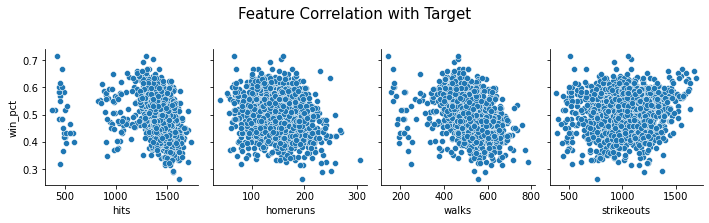

In [31]:
target_pairs = sns.pairplot(data=bb, x_vars=['hits', 'homeruns', 'walks', 'strikeouts'], y_vars=['win_pct'])
target_pairs.fig.suptitle('Feature Correlation with Target', y=1.2, fontsize=15)


In [25]:
resid = b_fit.predict(X) - y

rmse = np.sqrt(sum(resid**2)/len(resid))
print(rmse)

0.06245950481900766


In [7]:
def decade(year):
    if year in range(10):
        return '1970s'
    if year in range(10, 20):
        return '1980s'
    if year in range(20, 30):
        return '1990s'
    if year in range(30, 40):
        return '2000s'
    if year in range(40, 50):
        return '2010s'
    
    else:
        return '2020s'

In [8]:
bb['decade'] = bb.year.apply(decade)

In [9]:
decades = bb.groupby('decade').mean()
decades

,win_pct,era,games,innings,hits,homeruns,walks,strikeouts,hbp,batters_faced,fip,whip,kw_ratio,year,on_base_pct
decade,,,,,,,,,,,,,,,
1970s,0.500004,3.688455,161.016260,1443.905285,1400.130081,120.097561,531.585366,828.215447,31.252033,6142.113821,3.696423,1.337606,1.581951,4.585366,0.319301
1980s,0.499954,3.851731,156.438462,1402.000385,1380.253846,126.700000,504.476923,839.026923,27.903846,5968.846154,3.859115,1.343527,1.672385,14.500000,0.320119
1990s,0.500018,4.289029,155.352518,1388.084173,1407.669065,148.737410,532.719424,955.176259,43.381295,6000.471223,4.295971,1.399266,1.818094,24.633094,0.330511
2000s,0.499993,4.420100,161.940000,1443.336667,1475.043333,173.826667,541.633333,1062.486667,58.463333,6258.453333,4.427733,1.397360,1.995933,34.500000,0.331387
2010s,0.500010,4.075900,161.980000,1447.572000,1400.753333,173.103333,502.453333,1266.443333,55.690000,6163.126667,4.082033,1.314977,2.554700,44.500000,0.317640
2020s,0.499950,4.355500,110.900000,967.855000,898.716667,137.466667,364.766667,962.183333,48.883333,4138.733333,4.361833,1.312867,2.661333,50.500000,0.318033
